# Movies success rate and worldwide gross

I did my project with two IDE:
    
    1. pycharm 
    2. Jupyter notebook
At the beginning of the project I worked with PYCHARM I did all the crawling there until I had CSV, then I tried to make graphs but it did not work and after that I moved to JUPYTER NOTEBOOK

# Imports

In [1]:
import re
import time
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

# Crawling

crowling from site:https://www.the-numbers.com/movie/budgets/all
the columns:Number,Name,Date, Production Bdget, Domestic Gross, WorldWide Gross, Production Countries, Languages.

In [ ]:
def crawling():
    url = "https://www.the-numbers.com/movie/budgets/all"
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36'}  # This is chrome, you can set whatever browser you like
    # response = requests.get('https://www.the-numbers.com/movie/budgets/all',headers=headers)

    # print(result.content.decode())
    # print(result)

    list_date = []
    list_name = []
    list_production = []
    list_worldwideGross = []
    list_tables = []
    list_domesticGross = []
    list_links = []
    list_nums = []
    list_genre = []
    list_countryProd = []
    list_lang = []

    count = 101
    list_tables.append(url)
    df = pd.DataFrame(columns=["Number", "Name", "Date", "Production Bdget",
                      "Domestic Gross", "WorldWide Gross","Links"])
    print (df)
    #df.to_csv("movies.csv")
    df = pd.read_csv("movies.csv")
    for i in range(1,63):
        list_tables.append(f"https://www.the-numbers.com/movie/budgets/all/{count}")
        count+=100
    print(list_tables)
    count=1
    for page in range(0,len(list_tables)+1):
        result = requests.get(list_tables[page], headers=headers)
        soup = BeautifulSoup(result.content, 'html.parser')

        i = 0
        table = soup.find("table")
        rows = table.find_all("tr")
        for row in rows:
            cells = row.find_all("td")
            for cell in cells:
                url2 = "https://www.the-numbers.com"
                if (i % 6 == 0):
                    nums=cell.get_text()
                    list_nums.append(cell.get_text())
                if(i % 6 == 1):
                    date=cell.get_text()
                    list_date.append(cell.get_text())
                if (i % 6 == 2):
                    name=cell.get_text()
                    list_name.append(cell.get_text())
                    a = cell.find('a', href=True)
                    url3=url2 + '' + a['href']
                    list_links.append(url3)
                if (i % 6 == 3):
                    product = cell.get_text()
                    product = product.replace(u'\xa0', u'')
                    list_production.append(product)
                if (i % 6 == 4):
                    domestic = cell.get_text()
                    domestic = domestic.replace(u'\xa0', u'')
                    list_domesticGross.append(domestic)
                if (i % 6 == 5):
                    worldWide=cell.get_text()
                    worldWide = worldWide.replace(u'\xa0', u'')
                    list_worldwideGross.append(worldWide)
                i += 1
        df2=pd.DataFrame({"Number":list_nums, "Name":list_name, "Date":list_date, "Production Bdget":list_production,
                  "Domestic Gross":list_domesticGross, "WorldWide Gross":list_worldwideGross,"links":list_links})
        df=df.append(df2,ignore_index=True)
        df.to_csv("movies.csv")
        list_nums=[]
        list_date=[]
        list_name=[]
        list_links=[]
        list_production=[]
        list_domesticGross=[]
        list_worldwideGross=[]
        print(count)
        count+=100
        time.sleep(5)

    list_links = df['links']
    df["Genre"] = ""
    df["Production Countries"] = ""
    df["Languages"] = ""
    df["Rate"] = ""
    df.to_csv("movies.csv", index=False)
    line_index = 0
    for link in list_links:
        result = requests.get(link, headers=headers)
        print(result)
        soup = BeautifulSoup(result.content, 'html.parser')
        tables = soup.find_all("table")
        count = 0
        for table in tables:
            rows = table.find_all("tr")
            for row in rows:
                string = row.get_text()
                splitstring = string.split(":")
                if (splitstring[0] == "Genre") & (count == 0):
                    df.loc[line_index, "Genre"] = splitstring[1]
                    list_genre.append(splitstring[1])
                    count += 1
                elif (splitstring[0] == "Production Countries") & (count == 1):
                    str = splitstring[1]
                    str = str.replace(u'\n', u'')
                    df.loc[line_index, "Production Countries"] = str
                    list_countryProd.append(str)
                    count += 1
                elif (splitstring[0] == "Languages") & (count == 2):
                    str = splitstring[1]
                    str = str.replace(u'\n', u'')
                    df.loc[line_index, "Languages"] = str
                    list_lang.append(str)
                    count += 1
        df.to_csv("movies.csv")
        line_index += 1
        print(line_index)
        time.sleep(1)

In [ ]:
def add_time():
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36'}  # This is chrome, you can set whatever browser you like
    df=pd.read_csv("movies.csv")
    df2=pd.read_csv("learningMovies.csv")
    links=[]
    links=df["links"]
    print(links)
    line_index=3300
    for line_index in range(3300,len(links)):
        result = requests.get(links[line_index], headers=headers)
        soup = BeautifulSoup(result.content, 'html.parser')
        print(result.status_code)
        count=0
        tables = soup.find_all("table")
        for table in tables:
            rows = table.find_all("tr")
            for row in rows:
                string = row.get_text()
                splitstring = string.split(":")
                if (splitstring[0] == "Running Time")&(count==0) :
                    count+=1
                    splitstring[1]=splitstring[1].replace(u'\n', u'')
                    splitstring = splitstring[1].split(" ")
                    print(splitstring[0])
                    df2.loc[line_index, "time"] = splitstring[0]
                    df2.to_csv("learningMovies.csv", index=False)
        line_index+=1
        print(line_index)

fillMissing1 () is a function that I crawl the rating from another site. I had a problem that I could not take some ratings, so I split the reason for two reasons:
    
    1. wrong name 
    2. wrong span
    
fillMissingRate() is a function that i filled up all the "span problem".

In [ ]:
def fillMissing1():

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36'}  # This is chrome, you can set whatever browser you like

    ur="https://www.rottentomatoes.com/m/spectre_2015"
    result = requests.get(ur, headers=headers)
    soup = BeautifulSoup(result.content, 'html.parser')
    spans = soup.find_all('score-board',{'audiencestate':'upright'})
    print((spans))
    df2 = pd.DataFrame(columns=["NotWorked","Reasson"])
    df2.to_csv("movies2.csv",index=False)
    sp=str(spans[0])
    i = sp.find("audiencescore")
    i+=15
    print(i)
    print(sp[i],sp[i+1])
    rate=sp[i]+""+sp[i+1]
    ratee=int(rate)
    print(ratee,type(ratee))
    movieName = []
    movieLink=[]
    notWork=[]
    url = "https://www.rottentomatoes.com/m/"
    df = pd.read_csv("movies.csv")
    movieName = df["Name"]
    for movie in movieName:
        splitname = movie.replace(U' ', U'_')
        splitname = splitname.replace(U':', U'')
        re.sub(r'[^w]', '', splitname)
        movieLink.append(url + "" + splitname)
    indexnotwork=0

    for index in range(0,len(movieLink)):
        result = requests.get(movieLink[index], headers=headers)
        if(result.status_code==200):
            soup = BeautifulSoup(result.content, 'html.parser')
            spans = soup.find_all('score-board', {'audiencestate': 'upright'})
            if spans:
                sp = str(spans[0])
                i = sp.find("audiencescore")
                i += 15
                rate = sp[i] + "" + sp[i + 1]
                ratee = int(rate)
                print(ratee)
                df.loc[index,"Rate"]=ratee
                df.to_csv("movies.csv",index=False)
            else:
                print("span")
                print(movieName[index])
                notWork.append(movieName[index])
                df2.loc[indexnotwork,"NotWorked"]=movieName[index]
                df2.loc[indexnotwork,"Reasson"]="span"
                df2.to_csv("movies2.csv",index=False)
                indexnotwork+=1
        else:
            print("site")
            print(movieName[index])
            notWork.append(movieName[index])
            df2.loc[indexnotwork,"NotWorked"] = movieName[index]
            df2.loc[indexnotwork,"Reasson"] = "site"
            df2.to_csv("movies2.csv",index=False)
            indexnotwork+=1
        print(index)
        time.sleep(1)
        
def fillMissingRate():
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36'}  # This is chrome, you can set whatever browser you like

    ur = "https://www.rottentomatoes.com/m/"
    df2=pd.read_csv("movies2.csv")
    movieNames=[]
    reasson=[]
    movieNamesRealCsv=[]
    df=pd.read_csv("movies.csv")
    movieNamesRealCsv=df["Name"]
    reasson=df2["Reasson"]
    movieNames=df2["NotWorked"]
    index=0
    for index in range(0,len(movieNames)):
        if (reasson[index]=="span"):

            splitname = movieNames[index].replace(U' ', U'_')
            splitname = splitname.replace(U':', U'')
            re.sub(r'[^w]', '', splitname)
            url=ur+""+splitname
            print(url)
            result = requests.get(url, headers=headers)
            soup = BeautifulSoup(result.content, 'html.parser')
            spans = soup.find_all('score-board')
            if spans:
                sp = str(spans[0])
                i = sp.find("audiencescore")
                i += 15
                #print(sp[i], sp[i + 1])
                rate = sp[i] + "" + sp[i + 1]
                print (rate)
                if(rate!='" '):
                    rate=rate.replace(u'"', u'')
                    ratee = int(rate)
                    print(ratee)
                    i=0
                    for i in range(0,len(movieNamesRealCsv)):
                        if movieNames[index]==movieNamesRealCsv[i]:
                            df.loc[i,"Rate"]=ratee
                            df.to_csv("movies.csv", index=False)

            time.sleep(1)
            print("index:",index)
         
        
        
        
def changeRate():
    df2=pd.read_csv("learningMovies.csv")
    for i in range(0,len(df2["rate"])):
        df2.loc[i,"rate"]=df2.loc[i,"rate"]/10
    df2.to_csv("learningMovies.csv",index=False)


# Data Cleaning

I deleted all the films made before 1930, I merged the countries, I merged the languages and the genre

In [ ]:
def newDf_Of_Years_And_Clean_Years():
    df = pd.read_csv("movies.csv")
    years=[]
    df4 = pd.DataFrame(columns=["Year"])
    date=[]
    date=df["Date"]
    index=0
    for dat in date:
        if(dat!="Unknown"):
            splitname = dat.split(", ")
            if (len(splitname)>1):
                year=int(splitname[1])
                if(year<1930):
                    df=df.drop(df.index[index])
                    index-=1
            else:
                splitname=dat.split(",")
                if(len(splitname)>1):
                    if (year < 1930):
                        df = df.drop(df.index[index])
                        index -= 1
                    years.append(int(splitname[1]))
                else:
                    if (year < 1930):
                        df = df.drop(df.index[index])
                        index -= 1
                    years.append(int(dat))
        else:
            years.append(0)
            df = df.drop(df.index[index])
            index -= 1
        print("index=",index)
        index+=1
    #print(years)
    df4["Year"]=years
    df4.to_csv("movies5.csv",index=False)


In [ ]:
def merge_countries():
    l=0
    country=[]
    country=df["Production Countries"]
    df = pd.read_csv("movies.csv")
    for countr in countryname:
        splitcountry=countr.split(",")
        df.loc[l,"Production Countries"]=splitcountry[0]
        l+=1
    df.to_csv("movies.csv",index=False)

    
def merge_lang():
    l=0
    genres=[]
    genres=df["Genre"]
    df = pd.read_csv("movies.csv")
    for genre in genres:
        splitgenre=genre.split(",")
        df.loc[l,"Genre"]=splitgenre[0]
    l+=1
    df.to_csv("movies.csv",index=False)

I created a new DF "movies5" that counts the genres by years

And I also created a DF of "Successful Movies"(rate>80) "movies6" that counts the genres by years


In [ ]:
def newDf5():
    df = pd.read_csv("movies.csv")
    df6 =pd.DataFrame(columns= ["Year","Drama", "Comedy", "Action", "Adventure", "Thriller/Suspense", "Horror", "Romantic Comedy", "Documentary",
             "Black Comedy", "Musical", "Western", "Concert/Performance", "Multiple Genres"])
    df5 =pd.DataFrame(columns= ["Year", "Drama", "Comedy", "Action", "Adventure", "Thriller/Suspense", "Horror", "Romantic Comedy",
             "Documentary",
             "Black Comedy", "Musical", "Western", "Concert/Performance", "Multiple Genres"])
    years = []
    df4 = pd.DataFrame(columns=["Year"])
    # print(df.shape)
    date = []
    date = df["Date"]
    index = 0
    for dat in date:
        splitname = dat.split(", ")
        if (len(splitname) > 1):
            year = int(splitname[1])
            years.append(year)
        else:
            splitname = dat.split(",")
            if (len(splitname) > 1):
                years.append(int(splitname[1]))
            else:
                years.append(int(dat))
    df["Year"] = years
    df.to_csv("movies.csv", index=False)

In [ ]:
def newDf6():
    df = pd.read_csv("movies.csv")
    df6 = pd.DataFrame(columns=["Year", "Drama", "Comedy", "Action", "Adventure", "Thriller/Suspense", "Horror", "Romantic Comedy",
                     "Documentary",
                     "Black Comedy", "Musical", "Western", "Concert/Performance", "Multiple Genres"])
    df5 = pd.DataFrame(columns=["Year", "Drama", "Comedy", "Action", "Adventure", "Thriller/Suspense", "Horror", "Romantic Comedy",
                     "Documentary",
                     "Black Comedy", "Musical", "Western", "Concert/Performance", "Multiple Genres"])
    for i in range(0,93):
        df5.loc[i,"Year"]=1930+i
        df6.loc[i,"Year"] = 1930 + i
    years=[]
    years=df["Year"]
    df5=df5.fillna(0)
    df6=df6.fillna(0)
    i=0
    for i in range(0,len(years)):
        if(df.loc[i,"Rate"]>80):
            genre = df.loc[i, "Genre"]
            df5.loc[years[i]-1930,genre]+=1
        genre=df.loc[i,"Genre"]
        df6.loc[years[i] - 1930, genre] += 1

    df5.to_csv("movies5.csv",index=False)
    df6.to_csv("movies6.csv",index=False)

In [ ]:
def main():
    crawling()
    fillMissing1()
    fillMissingRate()
    newDf_Of_Years_And_Clean_Years()
    newDf5()
    newDf6()
    add_time()

if __name__ == '__main__':
    main()

### Imports

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

### File reading

In [3]:
df=pd.read_csv('movies.csv')
df5=pd.read_csv('movies5.csv')
df2=pd.read_csv('learningMovies.csv')

### Optional preliminary examination

In [4]:
df.head()

,Number,Name,Date,Production Bdget,Domestic Gross,WorldWide Gross,Links,links,Genre,Production Countries,Languages,Rate,Year,Time
0,1,Avengers: Endgame,"Apr 23, 2019","$400,000,000","$858,373,000","$2,797,800,564",NaN,https://www.the-numbers.com/movie/Avengers-End...,Action,United States,English,90.0,2019,181.0
1,2,Pirates of the Caribbean: On Stranger Tides,"May 20, 2011","$379,000,000","$241,071,802","$1,045,713,802",NaN,https://www.the-numbers.com/movie/Pirates-of-t...,Adventure,United States,English,54.0,2011,136.0
2,3,Avengers: Age of Ultron,"Apr 22, 2015","$365,000,000","$459,005,868","$1,395,316,979",NaN,https://www.the-numbers.com/movie/Avengers-Age...,Action,United States,English,83.0,2015,141.0
3,4,Star Wars Ep. VII: The Force Awakens,"Dec 16, 2015","$306,000,000","$936,662,225","$2,064,615,817",NaN,https://www.the-numbers.com/movie/Star-Wars-Ep...,Adventure,United States,English,65.0,2015,136.0
4,5,Avengers: Infinity War,"Apr 25, 2018","$300,000,000","$678,815,482","$2,048,359,754",NaN,https://www.the-numbers.com/movie/Avengers-Inf...,Action,United States,English,91.0,2018,156.0


In [4]:
df.shape

(5397, 14)

# EDA

## Amount of movies by genre

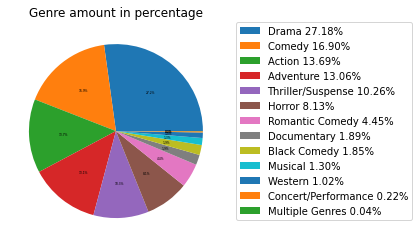

In [5]:

df["Genre"].value_counts().plot(kind='pie',labels=["","","","","","","","","","","","",""],title='Genre amount in percentage',ylabel='',autopct='%1.1f%%',fontsize=3)
percent=df["Genre"].value_counts()*100 /len(df["Genre"])
array=["Drama","Comedy","Action","Adventure","Thriller/Suspense","Horror","Romantic Comedy","Documentary","Black Comedy","Musical","Western","Concert/Performance","Multiple Genres"]
plt.legend(labels=['{} {:.2f}%'.format(idx,val) for idx,val in zip (array,percent)],bbox_to_anchor=(1.05, 1),
                        loc='upper left', borderaxespad=0.)

#  Movies over the years

we can see here amount movies published, and amount of success published movies over the years.

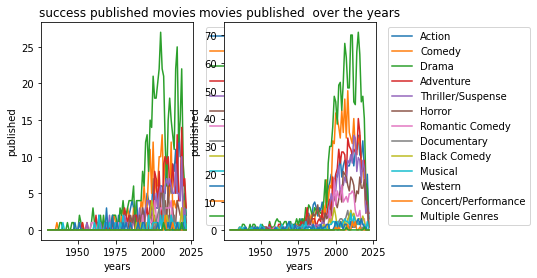

In [111]:
array=["Action","Comedy","Drama","Adventure","Thriller/Suspense","Horror","Romantic Comedy","Documentary","Black Comedy","Musical","Western","Concert/Performance","Multiple Genres"]
successdf=pd.read_csv("movies5.csv")
moviesdf=pd.read_csv("movies6.csv")
plt.subplot(1,2,1)
plt.plot(successdf.Year,successdf["Action"],successdf.Year,successdf["Comedy"],successdf.Year,successdf["Drama"],successdf.Year,successdf["Adventure"],successdf.Year,successdf["Thriller/Suspense"],successdf.Year,successdf["Horror"],successdf.Year,successdf["Romantic Comedy"],successdf.Year,successdf["Documentary"],successdf.Year,successdf["Black Comedy"],successdf.Year,successdf["Musical"],successdf.Year,successdf["Western"],successdf.Year,successdf["Concert/Performance"],successdf.Year,successdf["Multiple Genres"])
plt.legend(array,bbox_to_anchor=(1.05, 1))
plt.title("success published movies")
plt.xlabel("years")
plt.ylabel("published")
plt.subplot(1,2,2)
plt.plot(moviesdf.Year,moviesdf["Action"],moviesdf.Year,moviesdf["Comedy"],moviesdf.Year,moviesdf["Drama"],moviesdf.Year,moviesdf["Adventure"],moviesdf.Year,moviesdf["Thriller/Suspense"],moviesdf.Year,moviesdf["Horror"],moviesdf.Year,moviesdf["Romantic Comedy"],moviesdf.Year,moviesdf["Documentary"],moviesdf.Year,moviesdf["Black Comedy"],moviesdf.Year,moviesdf["Musical"],moviesdf.Year,moviesdf["Western"],moviesdf.Year,moviesdf["Concert/Performance"],moviesdf.Year,moviesdf["Multiple Genres"])
plt.legend(array,bbox_to_anchor=(1.05, 1))
plt.title("movies published  over the years")
plt.ylabel("published")
plt.xlabel("years")
plt.show()


In [5]:
gross=[]
prod=[]
neto=[]
gross=df2["world wide gross"]
prod=df2["production bdget"]
for ind in range(0,len(gross)):
    df2.loc[ind,"neto income"]=gross[ind]-prod[ind]
df2.to_csv("learningMovies.csv",index=False)

C:\Users\C889~1\AppData\Local\Temp/ipykernel_9064/512023078.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countryname[l]=splitcountry[0]


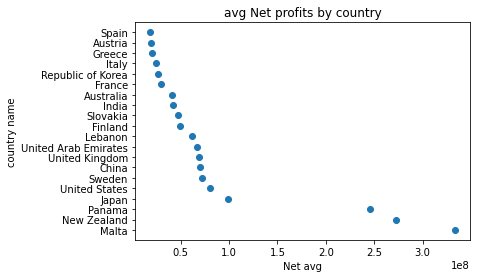

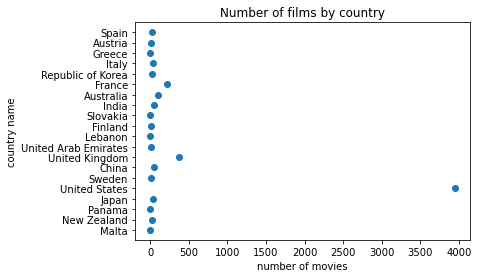

,name,count,avg neto
42,Malta,1,333152030
47,New Zealand,20,272140828
51,Panama,1,245200000
36,Japan,33,99169708
66,United States,3946,79854101
60,Sweden,5,72367697
13,China,53,70383009
65,United Kingdom,368,69099596
64,United Arab Emirates,5,67304066
39,Lebanon,1,61233790


In [83]:
netocountries=[0]*67
countries=[0]*67
countriesMone=[0]*67

countryname=[]
countryname=df["Production Countries"]
l=0
for countr in countryname:
    splitcountry=countr.split(",")
    countryname[l]=splitcountry[0]
    l+=1
l=0
country=[]
country=df2["country"]
for countr in country:
    countr=int(countr)
    netocountries[countr]+=df2.loc[l,"neto income"]
    countriesMone[countr]+=1
    countries[countr]=countryname[l]
    l+=1
avgneto=[0]*67
for i in range(0,len(countries)):
    avgneto[i]=int(netocountries[i]/countriesMone[i])
newdf=pd.DataFrame(columns=['name',"count","avg neto"])
newdf["name"]=countries
newdf["count"]=countriesMone
newdf["avg neto"]=avgneto
newdf=newdf.sort_values(by='avg neto', ascending=False)

#newdf.head(2).plot()
plt.title("avg Net profits by country")
plt.ylabel("country name")
plt.xlabel("Net avg")
plt.scatter(newdf["avg neto"].head(20),newdf.name.head(20))
#plt.plot(x=newdf.name.head(20),y=newdf["avg neto"].head(20),kind="bar")
plt.show()
plt.title("Number of films by country")
plt.xlabel("number of movies")
plt.ylabel("country name")
plt.scatter(newdf["count"].head(20),newdf.name.head(20))
plt.show()
newdf.head(20)

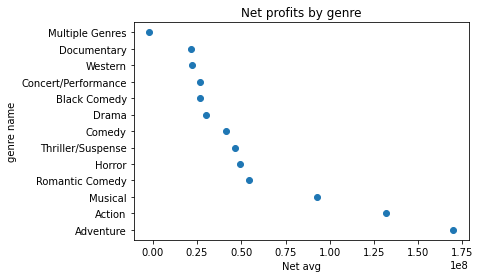

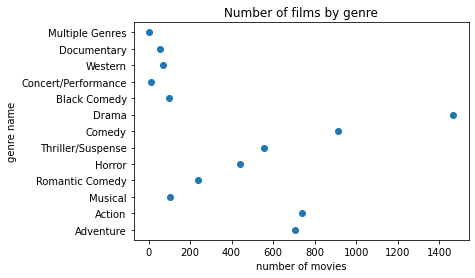

,name,count,avg neto
1,Adventure,705,169799386
0,Action,739,131588065
9,Musical,102,92565987
10,Romantic Comedy,240,54336172
7,Horror,439,49225608
11,Thriller/Suspense,554,46289442
3,Comedy,912,41199527
6,Drama,1467,30204327
2,Black Comedy,100,26539280
4,Concert/Performance,12,26502903


In [66]:
netogenre=[0]*13
genres=[0]*13
genreMone=[0]*13

genrename=[]
genrename=df["Genre"]
l=0
genre=[]
genre=df2["genre"]
for gene in genre:
    g=int(gene)
    netogenre[g]+=df2.loc[l,"neto income"]
    genreMone[g]+=1
    genres[g]=genrename[l]
    l+=1
avgneto=[0]*13
for i in range(0,len(genres)):
    avgneto[i]=int(netogenre[i]/genreMone[i])
newdf=pd.DataFrame(columns=['name',"count","avg neto"])
newdf["name"]=genres
newdf["count"]=genreMone
newdf["avg neto"]=avgneto
newdf=newdf.sort_values(by='avg neto', ascending=False)

#newdf.head(2).plot()
plt.title("Net profits by genre")
plt.ylabel("genre name")
plt.xlabel("Net avg")
plt.scatter(newdf["avg neto"],newdf.name)
#plt.plot(x=newdf.name.head(20),y=newdf["avg neto"].head(20),kind="bar")
plt.show()
plt.title("Number of films by genre")
plt.xlabel("number of movies")
plt.ylabel("genre name")
plt.scatter(newdf["count"],newdf.name)
plt.show()
newdf.head(20)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from re import sub
from decimal import Decimal
from sklearn.preprocessing import OrdinalEncoder
array=["Action","Comedy","Drama","Adventure","Thriller/Suspense","Horror","Romantic Comedy","Documentary","Black Comedy","Musical","Western","Concert/Performance","Multiple Genres"]
df=pd.read_csv("movies.csv")


ord_enc = OrdinalEncoder()
df["genre_code"] = ord_enc.fit_transform(df[["Genre"]])
df[["Genre", "genre_code"]]
df2 = pd.DataFrame(columns=["name","genre","time","year","country","lang","production bdget","domestic gross","world wide gross","rate"])
df2["name"]=df["Number"]
df2["genre"]=ord_enc.fit_transform(df[["Genre"]])
df2["year"]=df["Year"]
df2["country"]=ord_enc.fit_transform(df[["Production Countries"]])
df2["lang"]=ord_enc.fit_transform(df[["Languages"]])
df2["rate"]=df["Rate"]


i=0
for element in df["Production Bdget"]:
    df2.loc[i,"production bdget"]=(Decimal(sub(r'[^\d.]', '', element)))
    i+=1
j=0
for element in df["Domestic Gross"]:
    df2.loc[j,"domestic gross"]=(Decimal(sub(r'[^\d.]', '', element)))
    j+=1
k=0
for element in df["WorldWide Gross"]:
    df2.loc[k,"world wide gross"]=(Decimal(sub(r'[^\d.]', '', element)))
    k+=1
country=[]
country=df["Production Countries"]
l=0
for countr in country:
    splitcountry=countr.split(",")
    df2.loc[l,"country"]=splitcountry[0]
    l+=1
df2["production bdget"] = pd.to_numeric(df2["production bdget"], downcast="float")
df2["world wide gross"] = pd.to_numeric(df2["world wide gross"], downcast="float")
df2["domestic gross"] = pd.to_numeric(df2["domestic gross"], downcast="float")
df2["country"]=ord_enc.fit_transform(df2[["country"]])
df2.to_csv("learningMovies.csv",index=False)

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5397 entries, 0 to 5396
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5397 non-null   int64  
 1   genre             5397 non-null   float64
 2   time              5397 non-null   float64
 3   year              5397 non-null   int64  
 4   country           5397 non-null   float64
 5   lang              5397 non-null   float64
 6   production bdget  5397 non-null   float64
 7   domestic gross    5397 non-null   float64
 8   world wide gross  5397 non-null   float64
 9   rate              5397 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 421.8 KB


In [49]:

df3=df2[["genre","time","year","country","lang","production bdget","domestic gross","world wide gross","neto income","rate"]]
corr = df3.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\C889~1\AppData\Local\Temp/ipykernel_9064/1411424114.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,genre,time,year,country,lang,production bdget,domestic gross,world wide gross,neto income,rate
genre,1.00,0.07,-0.02,0.00,-0.01,-0.32,-0.23,-0.25,-0.20,0.01
time,0.07,1.00,-0.16,0.02,0.02,0.25,0.22,0.24,0.22,0.21
year,-0.02,-0.16,1.00,-0.08,0.05,0.21,0.05,0.12,0.09,-0.07
country,0.00,0.02,-0.08,1.00,-0.10,0.12,0.18,0.13,0.12,-0.00
lang,-0.01,0.02,0.05,-0.10,1.00,-0.08,-0.07,-0.04,-0.03,0.04
production bdget,-0.32,0.25,0.21,0.12,-0.08,1.00,0.67,0.73,0.59,0.01
domestic gross,-0.23,0.22,0.05,0.18,-0.07,0.67,1.00,0.94,0.92,0.13
world wide gross,-0.25,0.24,0.12,0.13,-0.04,0.73,0.94,1.00,0.98,0.11
neto income,-0.20,0.22,0.09,0.12,-0.03,0.59,0.92,0.98,1.00,0.13
rate,0.01,0.21,-0.07,-0.00,0.04,0.01,0.13,0.11,0.13,1.00


# Regression Models

I tried to predict 2 things:
    
    1.Predict rate of movies
    2.Predict gross of movies
    
I tried to predict with multiple models:

    1.LinearRegression()
    2.GradientBoostingRegressor()
    3.RandomForestRegressor()
    4.VotingRegressor()

In [82]:
df2.shape

(5397, 11)

In [101]:
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


y= df2["rate"]
X= df2.drop("rate",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

lr=LinearRegression()
grad=GradientBoostingRegressor(random_state=1)
rfs = RandomForestRegressor(random_state=1)


lr.fit(X_train,y_train)
grad.fit(X_train,y_train)
rfs.fit(X_train,y_train)
er = VotingRegressor([('lr', lr), ('rf', rfs), ('gr', grad)])
er.fit(X_train, y_train).predict(X_test)
yer_pred=er.score(X_test,y_test)

y_predtrain=lr.predict(X_train)
y_pred=lr.predict(X_test)
ygrad_pred=grad.predict(X_test)
yrand_pred=rfs.predict(X_test)


print("lr-train:",lr.score(X_train,y_predtrain))
print("lr:",lr.score(X_test,y_test))
print("grad:",grad.score(X_test,y_test))
print("rfs:",rfs.score(X_test,y_test))
print("voting Reg:",er.score(X_test,y_test))



lr-train: 1.0
lr: 0.053014529603156335
grad: 0.14284296822474085
rfs: 0.11223445552561195
voting Reg: 0.13472835183953935


In [18]:
dff=pd.DataFrame()
dfpreds=pd.DataFrame()
dfpreds=X_test
dfpreds= pd.merge(dfpreds,y_test,how = 'left',left_index = True, right_index = True)
dff["pred"]=ygrad_pred
i = 0
for i in range(0, len(dff["pred"])):
    y_pr = dff.loc[i, "pred"]
    dfpreds.loc[i, "pred"] = y_pr
    dfpreds.loc[i, "error(%)"] = abs((((dfpreds.loc[i, "rate"] - dfpreds.loc[i, "pred"]) / dfpreds.loc[i, "rate"]) * 100))
dfpreds.head(10)


,name,genre,time,year,country,lang,production bdget,domestic gross,world wide gross,rate,pred,error(%)
0,3866.0,6.0,110.0,1999.0,66.0,21.0,10000000.0,6197866.0,6199310.0,9.5,6.690523,29.573439
1,930.0,3.0,92.0,2003.0,66.0,21.0,60000000.0,104148780.0,164285580.0,4.8,6.353711,32.368974
2,4889.0,6.0,110.0,2003.0,7.0,39.0,3300000.0,7563397.0,32059296.0,8.3,7.270696,12.401251
3,207.0,0.0,129.0,2003.0,66.0,21.0,150000000.0,139270910.0,427300260.0,6.0,6.886450,14.774167
4,4676.0,3.0,95.0,2011.0,22.0,24.0,4600000.0,514237.0,9261711.0,7.8,6.625273,15.060597
5,2008.0,6.0,105.0,2010.0,66.0,21.0,30000000.0,53032452.0,82148536.0,6.2,6.528595,5.299921
6,1754.0,10.0,98.0,2008.0,66.0,21.0,35000000.0,80277650.0,218535710.0,8.1,6.364692,21.423559
7,5292.0,6.0,110.0,2005.0,66.0,21.0,1500000.0,712294.0,1126258.0,6.3,6.918639,9.819665
8,4969.0,6.0,95.0,1978.0,66.0,21.0,3000000.0,3446749.0,3660880.0,8.9,6.538909,26.529112
9,932.0,1.0,98.0,1998.0,66.0,21.0,60000000.0,101413180.0,218613180.0,7.3,6.421921,12.028486


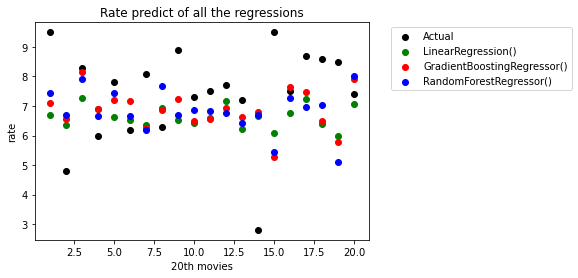

In [103]:
allpreds=pd.DataFrame({"Actual":y_test,"Grad":ygrad_pred,"LR":y_pred,"RF":yrand_pred})
y=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

plt.scatter(y,allpreds['Actual'].head(20),color='black')
plt.scatter(y,allpreds['LR'].head(20),color='green')
plt.scatter(y,allpreds['Grad'].head(20),color='red')
plt.scatter(y,allpreds['RF'].head(20),color='blue')
plt.legend(labels=['Actual','LinearRegression()','GradientBoostingRegressor()','RandomForestRegressor()'],bbox_to_anchor=(1.05, 1),
                        loc='upper left')
plt.title("Rate predict of all the regressions")
plt.xlabel("20th movies")
plt.ylabel("rate")
allpreds.head()
#allpreds.head().plot()
plt.show()

In [105]:
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

y=df2["world wide gross"]
X= df2.drop("world wide gross",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

lr=LinearRegression()
grad=GradientBoostingRegressor(random_state=1)
rfs = RandomForestRegressor(random_state=1)


lr.fit(X_train,y_train)
grad.fit(X_train,y_train)
rfs.fit(X_train,y_train)

er = VotingRegressor([('lr', lr), ('rf', rfs), ('gr', grad)])
er.fit(X_train, y_train).predict(X_test)
er.score(X_test,y_test)

y_pred=lr.predict(X_test)
ygrad_pred=grad.predict(X_test)
yrand_pred=rfs.predict(X_test)


print("lr:",lr.score(X_test,y_test))
print("grad:",grad.score(X_test,y_test))
print("rfs:",rfs.score(X_test,y_test))
print("voting Reg:",er.score(X_test,y_test))


lr: 0.9302431131664908
grad: 0.9028969508571438
rfs: 0.9306903898661512
voting Reg: 0.9310745827801803


In [36]:
dff2=pd.DataFrame()
dfpreds2=pd.DataFrame()
dfpreds2=X_test
dfpreds2= pd.merge(dfpreds2,y_test,how = 'left',left_index = True, right_index = True)
dff2["pred"]=y_pred
for i in range(0, len(dff2["pred"])):
    y_pr = dff2.loc[i, "pred"]
    dfpreds2.loc[i, "pred"] = y_pr
    dfpreds2.loc[i, "error(%)"] = abs((((dfpreds2.loc[i, "world wide gross"] - dfpreds2.loc[i, "pred"]) / dfpreds2.loc[i, "world wide gross"]) * 100))

dfpreds2.head(10)

,name,genre,time,year,country,lang,production bdget,domestic gross,rate,world wide gross,pred,error(%)
0,3866.0,6.0,110.0,1999.0,66.0,21.0,10000000.0,6197866.0,9.5,6199310.0,3.319259e+06,46.457600
1,930.0,3.0,92.0,2003.0,66.0,21.0,60000000.0,104148780.0,4.8,164285580.0,1.963655e+08,19.526894
2,4889.0,6.0,110.0,2003.0,7.0,39.0,3300000.0,7563397.0,8.3,32059296.0,4.797923e+07,49.657770
3,207.0,0.0,129.0,2003.0,66.0,21.0,150000000.0,139270910.0,6.0,427300260.0,3.665079e+08,14.227076
4,4676.0,3.0,95.0,2011.0,22.0,24.0,4600000.0,514237.0,7.8,9261711.0,1.892254e+07,104.309287
5,2008.0,6.0,105.0,2010.0,66.0,21.0,30000000.0,53032452.0,6.2,82148536.0,8.860194e+07,7.855769
6,1754.0,10.0,98.0,2008.0,66.0,21.0,35000000.0,80277650.0,8.1,218535710.0,1.433178e+08,34.419061
7,5292.0,6.0,110.0,2005.0,66.0,21.0,1500000.0,712294.0,6.3,1126258.0,1.493869e+05,86.735992
8,4969.0,6.0,95.0,1978.0,66.0,21.0,3000000.0,3446749.0,8.9,3660880.0,3.259660e+06,10.959656
9,932.0,1.0,98.0,1998.0,66.0,21.0,60000000.0,101413180.0,7.3,218613180.0,2.051328e+08,6.166300


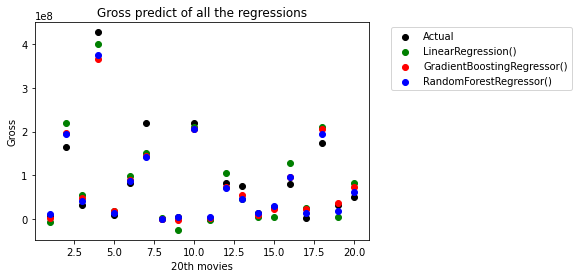

In [106]:
allpreds=pd.DataFrame({"Actual":y_test,"Grad":ygrad_pred,"LR":y_pred,"RF":yrand_pred})
y=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

plt.scatter(y,allpreds['Actual'].head(20),color='black')
plt.scatter(y,allpreds['LR'].head(20),color='green')
plt.scatter(y,allpreds['Grad'].head(20),color='red')
plt.scatter(y,allpreds['RF'].head(20),color='blue')
plt.legend(labels=['Actual','LinearRegression()','GradientBoostingRegressor()','RandomForestRegressor()'],bbox_to_anchor=(1.05, 1),
                        loc='upper left')
plt.title("Gross predict of all the regressions")
plt.xlabel("20th movies")
plt.ylabel("Gross")
plt.show()